In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [2]:
df=pd.read_csv('cancerdata.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
df.shape

(569, 32)

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

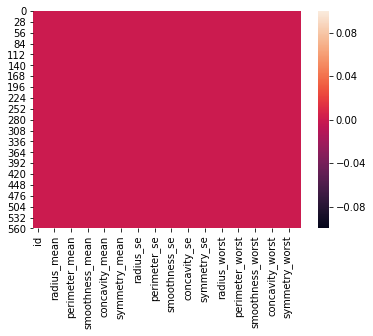

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df.dtypes.value_counts()

float64    30
object      1
int64       1
dtype: int64

In [12]:
df.drop('id',axis=1,inplace=True)

In [13]:
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
340,B,14.42,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.04223,0.1912,...,16.67,21.51,111.40,862.1,0.12940,0.33710,0.3755,0.14140,0.3053,0.08764
561,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
460,M,17.08,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.06431,0.1793,...,22.96,34.49,152.10,1648.0,0.16000,0.24440,0.2639,0.15550,0.3010,0.09060
361,B,13.30,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.02424,0.1815,...,14.20,29.20,92.94,621.2,0.11400,0.16670,0.1212,0.05614,0.2637,0.06658
473,B,12.27,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,0.1701,...,13.45,38.05,85.08,558.9,0.09422,0.05213,0.0000,0.00000,0.2409,0.06743


In [14]:
df.diagnosis=[1 if i=='M' else 0 for i in df.diagnosis]

In [15]:
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
467,0,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,...,11.15,24.62,71.11,380.2,0.13880,0.1255,0.06409,0.02500,0.3057,0.07875
341,0,9.606,16.84,61.64,280.5,0.08481,0.09228,0.08422,0.022920,0.2036,...,10.75,23.07,71.25,353.6,0.12330,0.3416,0.43410,0.08120,0.2982,0.09825
329,1,16.260,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.079810,0.1869,...,17.73,25.21,113.70,975.2,0.14260,0.2116,0.33440,0.10470,0.2736,0.07953
444,1,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.062540,0.1720,...,20.38,22.02,133.30,1292.0,0.12630,0.2666,0.42900,0.15350,0.2842,0.08225
197,1,18.080,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.057780,0.1770,...,19.76,24.70,129.10,1228.0,0.08822,0.1963,0.25350,0.09181,0.2369,0.06558


In [16]:
y=df.diagnosis
x=df.drop('diagnosis',axis=1)

In [17]:
#Splitting data into train and test set

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
sc=StandardScaler()

xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [20]:
# we will now build  ANN model
# Function to create model, required for KerasClassifier
def creat_model():
    model=Sequential()
    model.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=xtrain.shape[1]))
    model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [21]:
model=KerasClassifier(build_fn=creat_model,epochs=300)
acc=cross_val_score(estimator=model,X=xtrain,y=ytrain,cv=3)
mean=acc.mean()

Epoch 1/300
303/303 [==============================] - 2s 5ms/step - loss: 0.6909 - accuracy: 0.7624
Epoch 2/300
303/303 [==============================] - 0s 323us/step - loss: 0.6792 - accuracy: 0.9010
Epoch 3/300
303/303 [==============================] - 0s 284us/step - loss: 0.6490 - accuracy: 0.9406
Epoch 4/300
303/303 [==============================] - 0s 175us/step - loss: 0.5842 - accuracy: 0.9472
Epoch 5/300
303/303 [==============================] - 0s 178us/step - loss: 0.4791 - accuracy: 0.9406
Epoch 6/300
303/303 [==============================] - ETA: 0s - loss: 0.4037 - accuracy: 0.96 - 0s 115us/step - loss: 0.3516 - accuracy: 0.9472
Epoch 7/300
303/303 [==============================] - 0s 152us/step - loss: 0.2451 - accuracy: 0.9505
Epoch 8/300
303/303 [==============================] - 0s 148us/step - loss: 0.1800 - accuracy: 0.9538
Epoch 9/300
303/303 [==============================] - 0s 162us/step - loss: 0.1429 - accuracy: 0.9637
Epoch 10/300
303/303 [===========

303/303 [==============================] - 0s 139us/step - loss: 0.0117 - accuracy: 0.9967
Epoch 79/300
303/303 [==============================] - 0s 178us/step - loss: 0.0115 - accuracy: 0.9967
Epoch 80/300
303/303 [==============================] - 0s 139us/step - loss: 0.0115 - accuracy: 0.9934
Epoch 81/300
303/303 [==============================] - 0s 280us/step - loss: 0.0112 - accuracy: 0.9967
Epoch 82/300
303/303 [==============================] - 0s 145us/step - loss: 0.0104 - accuracy: 0.9967
Epoch 83/300
303/303 [==============================] - 0s 175us/step - loss: 0.0100 - accuracy: 0.9967
Epoch 84/300
303/303 [==============================] - 0s 135us/step - loss: 0.0099 - accuracy: 0.9967
Epoch 85/300
303/303 [==============================] - 0s 175us/step - loss: 0.0099 - accuracy: 0.9967
Epoch 86/300
303/303 [==============================] - 0s 125us/step - loss: 0.0085 - accuracy: 0.9967
Epoch 87/300
303/303 [==============================] - 0s 119us/step - loss:

303/303 [==============================] - 0s 139us/step - loss: 8.2944e-04 - accuracy: 1.0000
Epoch 157/300
303/303 [==============================] - 0s 135us/step - loss: 8.0085e-04 - accuracy: 1.0000
Epoch 158/300
303/303 [==============================] - 0s 152us/step - loss: 7.7857e-04 - accuracy: 1.0000
Epoch 159/300
303/303 [==============================] - 0s 135us/step - loss: 7.5559e-04 - accuracy: 1.0000
Epoch 160/300
303/303 [==============================] - 0s 366us/step - loss: 7.2446e-04 - accuracy: 1.0000
Epoch 161/300
303/303 [==============================] - 0s 376us/step - loss: 7.1875e-04 - accuracy: 1.0000
Epoch 162/300
303/303 [==============================] - ETA: 0s - loss: 7.0511e-04 - accuracy: 1.00 - 0s 482us/step - loss: 6.9910e-04 - accuracy: 1.0000
Epoch 163/300
303/303 [==============================] - 0s 327us/step - loss: 6.7816e-04 - accuracy: 1.0000
Epoch 164/300
303/303 [==============================] - 0s 241us/step - loss: 6.5152e-04 - accu

303/303 [==============================] - 0s 162us/step - loss: 1.7367e-04 - accuracy: 1.0000
Epoch 230/300
303/303 [==============================] - 0s 191us/step - loss: 1.7190e-04 - accuracy: 1.0000
Epoch 231/300
303/303 [==============================] - 0s 142us/step - loss: 1.6791e-04 - accuracy: 1.0000
Epoch 232/300
303/303 [==============================] - 0s 145us/step - loss: 1.6691e-04 - accuracy: 1.0000
Epoch 233/300
303/303 [==============================] - 0s 158us/step - loss: 1.6137e-04 - accuracy: 1.0000
Epoch 234/300
303/303 [==============================] - 0s 158us/step - loss: 1.6286e-04 - accuracy: 1.0000
Epoch 235/300
303/303 [==============================] - 0s 112us/step - loss: 1.5920e-04 - accuracy: 1.0000
Epoch 236/300
303/303 [==============================] - 0s 132us/step - loss: 1.5496e-04 - accuracy: 1.0000
Epoch 237/300
303/303 [==============================] - 0s 129us/step - loss: 1.5277e-04 - accuracy: 1.0000
Epoch 238/300
303/303 [==========

303/303 [==============================] - 0s 122us/step - loss: 0.6476 - accuracy: 0.9175
Epoch 4/300
303/303 [==============================] - 0s 112us/step - loss: 0.5779 - accuracy: 0.9241
Epoch 5/300
303/303 [==============================] - 0s 112us/step - loss: 0.4663 - accuracy: 0.9208
Epoch 6/300
303/303 [==============================] - 0s 145us/step - loss: 0.3354 - accuracy: 0.9208
Epoch 7/300
303/303 [==============================] - 0s 181us/step - loss: 0.2358 - accuracy: 0.9340
Epoch 8/300
303/303 [==============================] - 0s 198us/step - loss: 0.1791 - accuracy: 0.9373
Epoch 9/300
303/303 [==============================] - 0s 139us/step - loss: 0.1458 - accuracy: 0.9571
Epoch 10/300
303/303 [==============================] - 0s 185us/step - loss: 0.1235 - accuracy: 0.9604
Epoch 11/300
303/303 [==============================] - 0s 234us/step - loss: 0.1085 - accuracy: 0.9637
Epoch 12/300
303/303 [==============================] - 0s 158us/step - loss: 0.096

303/303 [==============================] - 0s 122us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 82/300
303/303 [==============================] - 0s 112us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 83/300
303/303 [==============================] - 0s 115us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 84/300
303/303 [==============================] - 0s 119us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 85/300
303/303 [==============================] - 0s 125us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 86/300
303/303 [==============================] - 0s 106us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 87/300
303/303 [==============================] - 0s 115us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 88/300
303/303 [==============================] - 0s 109us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 89/300
303/303 [==============================] - 0s 115us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 90/300
303/303 [==============================] - 0s 139us/step - loss:

Epoch 158/300
303/303 [==============================] - 1s 2ms/step - loss: 6.1256e-04 - accuracy: 1.0000
Epoch 159/300
303/303 [==============================] - 0s 369us/step - loss: 5.9249e-04 - accuracy: 1.0000
Epoch 160/300
303/303 [==============================] - 0s 132us/step - loss: 5.9810e-04 - accuracy: 1.0000
Epoch 161/300
303/303 [==============================] - 0s 208us/step - loss: 5.7745e-04 - accuracy: 1.0000
Epoch 162/300
303/303 [==============================] - 0s 165us/step - loss: 5.6211e-04 - accuracy: 1.0000
Epoch 163/300
303/303 [==============================] - 0s 125us/step - loss: 5.5053e-04 - accuracy: 1.0000
Epoch 164/300
303/303 [==============================] - 0s 102us/step - loss: 5.4180e-04 - accuracy: 1.0000
Epoch 165/300
303/303 [==============================] - 0s 96us/step - loss: 5.3284e-04 - accuracy: 1.0000
Epoch 166/300
303/303 [==============================] - 0s 96us/step - loss: 5.2827e-04 - accuracy: 1.0000
Epoch 167/300
303/303 [

303/303 [==============================] - 0s 109us/step - loss: 2.0745e-04 - accuracy: 1.0000
Epoch 234/300
303/303 [==============================] - 0s 145us/step - loss: 2.0470e-04 - accuracy: 1.0000
Epoch 235/300
303/303 [==============================] - 0s 132us/step - loss: 2.0252e-04 - accuracy: 1.0000
Epoch 236/300
303/303 [==============================] - 0s 125us/step - loss: 2.0216e-04 - accuracy: 1.0000
Epoch 237/300
303/303 [==============================] - 0s 122us/step - loss: 2.0488e-04 - accuracy: 1.0000
Epoch 238/300
303/303 [==============================] - 0s 119us/step - loss: 1.9465e-04 - accuracy: 1.0000
Epoch 239/300
303/303 [==============================] - 0s 132us/step - loss: 1.9206e-04 - accuracy: 1.0000
Epoch 240/300
303/303 [==============================] - 0s 135us/step - loss: 1.9189e-04 - accuracy: 1.0000
Epoch 241/300
303/303 [==============================] - 0s 112us/step - loss: 1.8855e-04 - accuracy: 1.0000
Epoch 242/300
303/303 [==========

304/304 [==============================] - 0s 437us/step - loss: 0.1689 - accuracy: 0.9638
Epoch 9/300
304/304 [==============================] - 0s 155us/step - loss: 0.1304 - accuracy: 0.9770
Epoch 10/300
304/304 [==============================] - 0s 490us/step - loss: 0.1059 - accuracy: 0.9803
Epoch 11/300
304/304 [==============================] - 0s 256us/step - loss: 0.0899 - accuracy: 0.9770
Epoch 12/300
304/304 [==============================] - 0s 523us/step - loss: 0.0796 - accuracy: 0.9803
Epoch 13/300
304/304 [==============================] - 0s 141us/step - loss: 0.0726 - accuracy: 0.9836
Epoch 14/300
304/304 [==============================] - 0s 178us/step - loss: 0.0672 - accuracy: 0.9836
Epoch 15/300
304/304 [==============================] - 0s 181us/step - loss: 0.0634 - accuracy: 0.9836
Epoch 16/300
304/304 [==============================] - 0s 220us/step - loss: 0.0595 - accuracy: 0.9868
Epoch 17/300
304/304 [==============================] - 0s 148us/step - loss: 

304/304 [==============================] - 0s 355us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 86/300
304/304 [==============================] - 0s 388us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 87/300
304/304 [==============================] - 0s 424us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 88/300
304/304 [==============================] - 0s 273us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 89/300
304/304 [==============================] - 0s 276us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 90/300
304/304 [==============================] - 0s 135us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 91/300
304/304 [==============================] - 0s 145us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 92/300
304/304 [==============================] - 0s 240us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 93/300
304/304 [==============================] - 0s 224us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 94/300
304/304 [==============================] - 0s 135us/step - loss:

304/304 [==============================] - 0s 138us/step - loss: 3.6066e-04 - accuracy: 1.0000
Epoch 162/300
304/304 [==============================] - 0s 99us/step - loss: 3.5388e-04 - accuracy: 1.0000
Epoch 163/300
304/304 [==============================] - 0s 138us/step - loss: 3.4844e-04 - accuracy: 1.0000
Epoch 164/300
304/304 [==============================] - 0s 115us/step - loss: 3.4014e-04 - accuracy: 1.0000
Epoch 165/300
304/304 [==============================] - 0s 132us/step - loss: 3.3506e-04 - accuracy: 1.0000
Epoch 166/300
304/304 [==============================] - 0s 138us/step - loss: 3.2702e-04 - accuracy: 1.0000
Epoch 167/300
304/304 [==============================] - 0s 184us/step - loss: 3.1928e-04 - accuracy: 1.0000
Epoch 168/300
304/304 [==============================] - 0s 191us/step - loss: 3.1382e-04 - accuracy: 1.0000
Epoch 169/300
304/304 [==============================] - 0s 141us/step - loss: 3.0815e-04 - accuracy: 1.0000
Epoch 170/300
304/304 [===========

304/304 [==============================] - 0s 141us/step - loss: 1.1472e-04 - accuracy: 1.0000
Epoch 236/300
304/304 [==============================] - 0s 118us/step - loss: 1.1354e-04 - accuracy: 1.0000
Epoch 237/300
304/304 [==============================] - 0s 184us/step - loss: 1.1170e-04 - accuracy: 1.0000
Epoch 238/300
304/304 [==============================] - 0s 122us/step - loss: 1.1064e-04 - accuracy: 1.0000
Epoch 239/300
304/304 [==============================] - 0s 141us/step - loss: 1.0953e-04 - accuracy: 1.0000
Epoch 240/300
304/304 [==============================] - 0s 145us/step - loss: 1.0807e-04 - accuracy: 1.0000
Epoch 241/300
304/304 [==============================] - 0s 115us/step - loss: 1.0685e-04 - accuracy: 1.0000
Epoch 242/300
304/304 [==============================] - 0s 102us/step - loss: 1.0551e-04 - accuracy: 1.0000
Epoch 243/300
304/304 [==============================] - 0s 95us/step - loss: 1.0437e-04 - accuracy: 1.0000
Epoch 244/300
304/304 [===========

In [22]:
print("Accuracy mean: "+ str(mean))

Accuracy mean: 0.9625885883967081


In [23]:
model.fit(xtrain,ytrain,batch_size=10,nb_epoch=300)

Epoch 1/300
455/455 [==============================] - 1s 3ms/step - loss: 0.6422 - accuracy: 0.9011
Epoch 2/300
455/455 [==============================] - 0s 705us/step - loss: 0.2775 - accuracy: 0.9385
Epoch 3/300
455/455 [==============================] - 0s 624us/step - loss: 0.1160 - accuracy: 0.9692
Epoch 4/300
455/455 [==============================] - 0s 461us/step - loss: 0.0862 - accuracy: 0.9692
Epoch 5/300
455/455 [==============================] - 0s 398us/step - loss: 0.0743 - accuracy: 0.9802
Epoch 6/300
455/455 [==============================] - 0s 417us/step - loss: 0.0677 - accuracy: 0.9824
Epoch 7/300
455/455 [==============================] - 0s 431us/step - loss: 0.0625 - accuracy: 0.9824
Epoch 8/300
455/455 [==============================] - 0s 448us/step - loss: 0.0580 - accuracy: 0.9846
Epoch 9/300
455/455 [==============================] - 0s 723us/step - loss: 0.0551 - accuracy: 0.9846
Epoch 10/300
455/455 [==============================] - 1s 1ms/step - loss:

455/455 [==============================] - 0s 789us/step - loss: 7.5873e-04 - accuracy: 1.0000
Epoch 80/300
455/455 [==============================] - 0s 571us/step - loss: 7.5707e-04 - accuracy: 1.0000
Epoch 81/300
455/455 [==============================] - 0s 463us/step - loss: 7.2130e-04 - accuracy: 1.0000
Epoch 82/300
455/455 [==============================] - 0s 527us/step - loss: 6.6619e-04 - accuracy: 1.0000
Epoch 83/300
455/455 [==============================] - 0s 354us/step - loss: 6.4349e-04 - accuracy: 1.0000
Epoch 84/300
455/455 [==============================] - 0s 395us/step - loss: 6.5306e-04 - accuracy: 1.0000
Epoch 85/300
455/455 [==============================] - 0s 507us/step - loss: 6.2306e-04 - accuracy: 1.0000
Epoch 86/300
455/455 [==============================] - 0s 843us/step - loss: 6.0747e-04 - accuracy: 1.00000s - loss: 6.3360e-04 - accuracy: 1.
Epoch 87/300
455/455 [==============================] - 0s 729us/step - loss: 5.4690e-04 - accuracy: 1.0000
Epoch

Epoch 154/300
455/455 [==============================] - 1s 1ms/step - loss: 7.0394e-05 - accuracy: 1.0000
Epoch 155/300
455/455 [==============================] - 0s 899us/step - loss: 6.8064e-05 - accuracy: 1.0000
Epoch 156/300
455/455 [==============================] - 0s 297us/step - loss: 6.7102e-05 - accuracy: 1.0000
Epoch 157/300
455/455 [==============================] - 0s 299us/step - loss: 6.6006e-05 - accuracy: 1.0000
Epoch 158/300
455/455 [==============================] - 0s 345us/step - loss: 6.4166e-05 - accuracy: 1.0000
Epoch 159/300
455/455 [==============================] - 0s 314us/step - loss: 6.2852e-05 - accuracy: 1.0000
Epoch 160/300
455/455 [==============================] - 0s 378us/step - loss: 6.0093e-05 - accuracy: 1.0000
Epoch 161/300
455/455 [==============================] - 0s 345us/step - loss: 5.8011e-05 - accuracy: 1.0000
Epoch 162/300
455/455 [==============================] - 0s 745us/step - loss: 5.6189e-05 - accuracy: 1.0000
Epoch 163/300
455/455

455/455 [==============================] - 0s 384us/step - loss: 9.5949e-06 - accuracy: 1.0000
Epoch 228/300
455/455 [==============================] - 0s 310us/step - loss: 9.2567e-06 - accuracy: 1.0000
Epoch 229/300
455/455 [==============================] - 1s 2ms/step - loss: 9.0382e-06 - accuracy: 1.0000: 0s - loss: 1.1106e-05 - accura
Epoch 230/300
455/455 [==============================] - 0s 617us/step - loss: 8.8724e-06 - accuracy: 1.0000
Epoch 231/300
455/455 [==============================] - 0s 347us/step - loss: 8.7265e-06 - accuracy: 1.0000
Epoch 232/300
455/455 [==============================] - 0s 400us/step - loss: 8.4626e-06 - accuracy: 1.0000
Epoch 233/300
455/455 [==============================] - 0s 340us/step - loss: 8.1682e-06 - accuracy: 1.0000
Epoch 234/300
455/455 [==============================] - 0s 345us/step - loss: 8.0012e-06 - accuracy: 1.0000
Epoch 235/300
455/455 [==============================] - 0s 400us/step - loss: 7.7322e-06 - accuracy: 1.0000
Epo

455/455 [==============================] - 0s 426us/step - loss: 1.4436e-06 - accuracy: 1.0000


In [24]:
pred=model.predict(xtest)

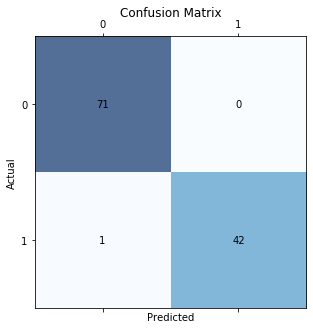

In [25]:
cm=confusion_matrix(ytest,pred)
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(cm,cmap=plt.cm.Blues,alpha=0.7)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j,y=i,s=cm[i,j],va='center',ha='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()